<a href="https://colab.research.google.com/github/mkakade92/DeepLearning/blob/master/Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters
((train_data,train_labels),(test_data,test_labels))=reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [0]:
import numpy as np

def vectorize(seq,dim=10000):
  results=np.zeros((len(seq),dim))
  for i,seq in enumerate(seq):
    results[i,seq]=1
  return results

In [0]:
x_train=vectorize(train_data)

y_train=vectorize(test_data)


In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
#One Hot Encodeing labels
from keras.utils.np_utils import to_categorical

x_label=to_categorical(train_labels)
y_label=to_categorical(test_labels)



In [14]:
x_label[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [18]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = x_label[:1000]
partial_y_train = x_label[1000:]

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 73us/step - loss: 0.2936 - acc: 0.9354 - val_loss: 1.3270 - val_acc: 0.7350
Epoch 2/10
7982/7982 [==============================] - 1s 74us/step - loss: 0.2291 - acc: 0.9412 - val_loss: 0.9913 - val_acc: 0.8000
Epoch 3/10
7982/7982 [==============================] - 1s 73us/step - loss: 0.1799 - acc: 0.9533 - val_loss: 0.9801 - val_acc: 0.8190
Epoch 4/10
7982/7982 [==============================] - 1s 75us/step - loss: 0.1754 - acc: 0.9508 - val_loss: 0.9972 - val_acc: 0.8060
Epoch 5/10
7982/7982 [==============================] - 1s 74us/step - loss: 0.1451 - acc: 0.9555 - val_loss: 1.0565 - val_acc: 0.8070
Epoch 6/10
7982/7982 [==============================] - 1s 74us/step - loss: 0.1307 - acc: 0.9549 - val_loss: 1.2938 - val_acc: 0.7590
Epoch 7/10
7982/7982 [==============================] - 1s 75us/step - loss: 0.1306 - acc: 0.9535 - val_loss: 1.0884 - val_acc: 0.8110
Epoch 8

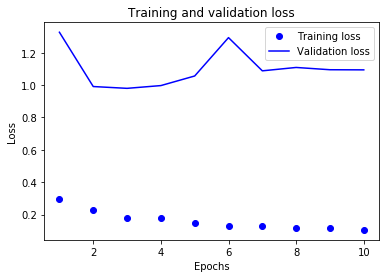

In [25]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

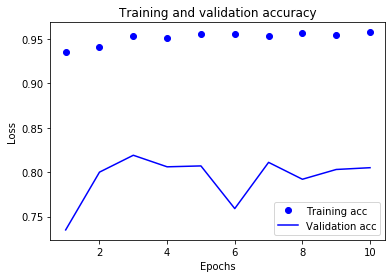

In [26]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(y_train, y_label)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 92us/step - loss: 2.6174 - acc: 0.5499 - val_loss: 1.7111 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 64us/step - loss: 1.4121 - acc: 0.7103 - val_loss: 1.3112 - val_acc: 0.7010
Epoch 3/9
7982/7982 [==============================] - 1s 65us/step - loss: 1.0471 - acc: 0.7765 - val_loss: 1.1449 - val_acc: 0.7570
Epoch 4/9
7982/7982 [==============================] - 1s 63us/step - loss: 0.8248 - acc: 0.8207 - val_loss: 1.0539 - val_acc: 0.7800
Epoch 5/9
7982/7982 [==============================] - 1s 65us/step - loss: 0.6585 - acc: 0.8568 - val_loss: 0.9915 - val_acc: 0.7880
Epoch 6/9
7982/7982 [==============================] - 1s 64us/step - loss: 0.5270 - acc: 0.8894 - val_loss: 0.9319 - val_acc: 0.8090
Epoch 7/9
7982/7982 [==============================] - 1s 64us/step - loss: 0.4244 - acc: 0.9121 - val_loss: 0.9309 - val_acc: 0.8150
Epoch 8/9
7982

In [29]:
results

[0.9932698029444246, 0.7898486197950154]